In [550]:
'''
This script designs K Means clustering from scratch and implements it on a randomly generated data
'''
import numpy as np
from random import randint
import seaborn as sns
import matplotlib.pyplot as plt

In [551]:
'''
To generate random data that belongs to 4 clusters
'''
def random_data():
        np.random.seed(1)
        x = 2
        data1 = np.random.normal(size=(100, 2)) + [ x, x]
        data2 = np.random.normal(size=(100, 2)) + [ x,-x]
        data3 = np.random.normal(size=(100, 2)) + [-x,-x]
        data4 = np.random.normal(size=(100, 2)) + [-x, x]
        data  = np.concatenate((data1, data2, data3, data4))
        np.random.shuffle(data)
        return data

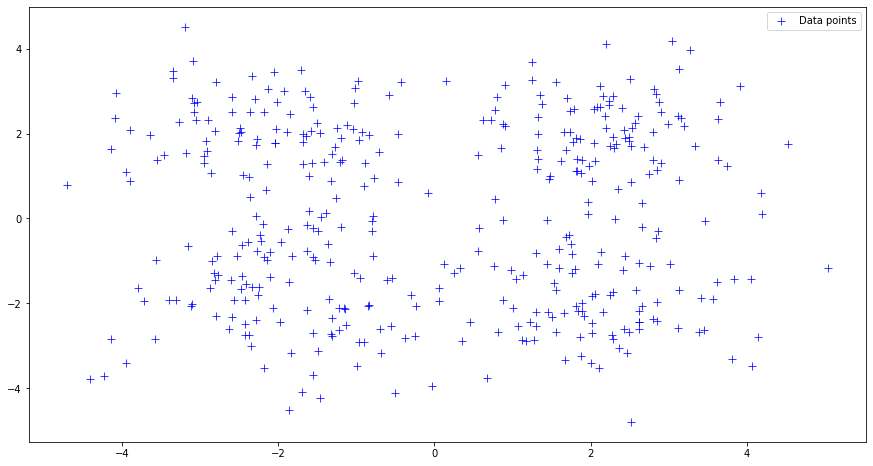

In [552]:
# Now let us try to plot this data 
dat = random_data()
plt.figure(figsize=(15,8))
sns.scatterplot(x = dat[:,0], y = dat[:,1], color = 'blue', marker="+", s = 50, label = 'Data points')

## Steps in K-Means Clustering Algorithm 
- K Means is an unsupervised algorithm
- The one user give input is K = no of clusters

Following are the steps in this algorithm:
 - Step 1: Select k random points as initial cluster centroids 
 - Step 2: Assign each data point to a cluster based on the nearest centroid (Euclidean distance)
 - Step 3: Calculate mean of data points in each cluster and reassign them as the new centroid
 - Step 4: Repeat steps 2 and 3 till the clusters remain unchaged

Let's go through these steps one by one

### One of the most important questions in K-Means is how do we find the value of K, that is predict the number of clusters. I will answer that question at the end of this document. 

## Step 1: Select k random points as initial cluster centroids

In [553]:
# For this we first take input from the user for number of clusters
k = int(input("Enter k: \n"))

Enter k: 
4


In [554]:
# Initialize the clusters
centroids  = dat[[randint(0, len(dat)-1) for p in range(0, k)],:]
original_centroids = centroids
centroids

array([[ 3.46210794, -0.06014071],
       [ 2.85328122, -2.41302931],
       [-0.61368574, -1.45187042],
       [ 1.43769457, -0.04512192]])

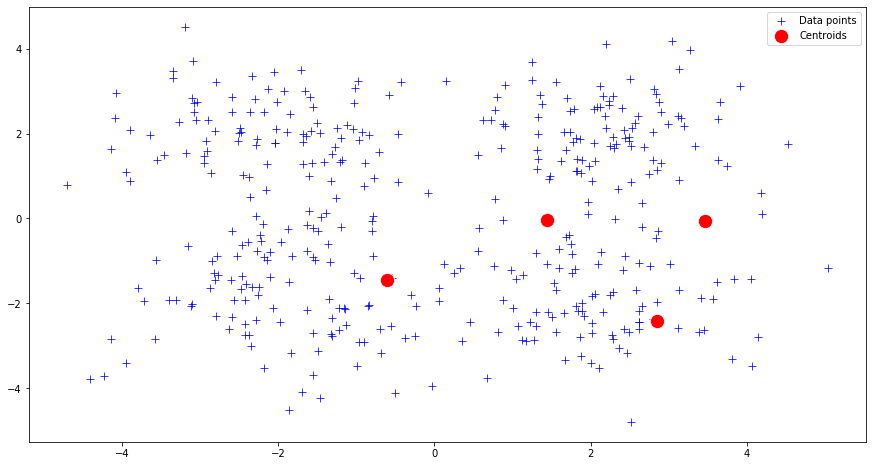

In [555]:
# Let's plot and see how the initial centroids are arranged in data
plt.figure(figsize=(15,8))
sns.scatterplot(x = dat[:,0], y = dat[:,1], color = 'blue', marker="+", s = 50, label = 'Data points')
sns.scatterplot(x = centroids[:,0], y = centroids[:,1], color = 'red', s = 200, label = 'Centroids')

## Step 2: Assign data points to clusters based on nearest centroid

In [556]:
'''
This function calculates the distance between each data point and the current centroids. 
And stores this information to a distance matrix
'''
def find_dist(dat,centroids):
    dist_mat = np.zeros((len(dat),len(centroids)))
    for i in range(len(dat)):
        for j in range(len(centroids)):
            x = dat[i,:]
            c = centroids[j,:]
            dist_mat[i,j] = (x[0]-c[0])**2 + (x[1]-c[1])**2
    return (dist_mat)

In [557]:
'''
This funcion assigns clusters by finding the nearest centroid to each data point
'''
def assign_cluster(dist_mat):
    cluster_assignment = np.zeros(len(dist_mat))
    for i in range(len(dist_mat)):
        dist_row = dist_mat[i,:]
        cluster_assignment[i] = np.where( dist_row == dist_row.min())[0][0]
    return cluster_assignment

In [558]:
dist_mat = find_dist(dat,centroids)
cluster_assignment = assign_cluster(dist_mat)

## Step 3: Find the mean of each cluster and assign that as the new centroids

In [559]:
def find_centroid(dat,cluster_assignment,k):
    centroids = np.zeros((k,2))
    for i in range(k):
        cluster_ind = np.where(cluster_assignment==i)
        cluster = dat[cluster_ind,:]
        centroids[i] = np.mean(cluster,axis=1)
    return centroids

In [560]:
centroids = find_centroid(dat,cluster_assignment,k)
centroids

array([[ 3.11545868,  1.4776025 ],
       [ 2.30108257, -2.47746749],
       [-2.01595812, -0.4538089 ],
       [ 0.9547194 ,  1.53877793]])

Text(0.5, 1.0, 'Iteration 1')

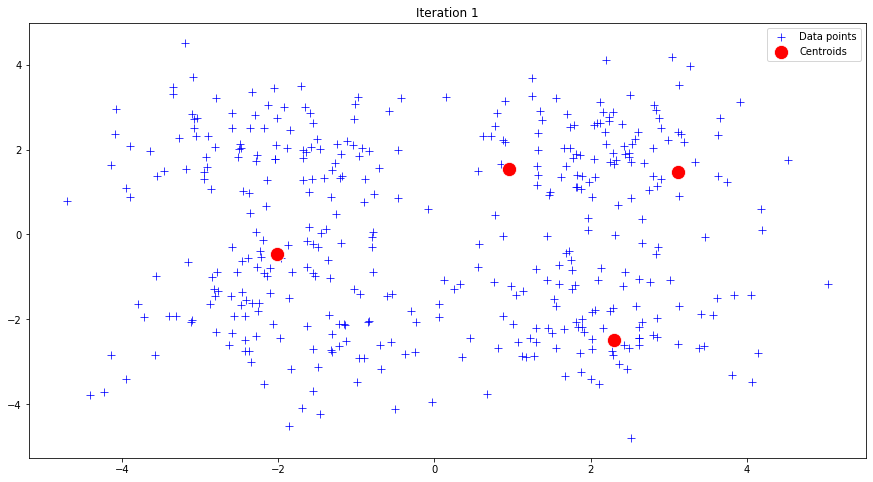

In [561]:
# Let's check how the centroids have shifted after one iteration
dist_mat = find_dist(dat,centroids)
cluster_assignment = assign_cluster(dist_mat)
plt.figure(figsize=(15,8))
sns.scatterplot(x = dat[:,0], y = dat[:,1], color = 'blue', marker="+", s = 50, label = 'Data points')
sns.scatterplot(x = centroids[:,0], y = centroids[:,1], color = 'red', s = 200, label = 'Centroids')
plt.title('Iteration 1')

## Step 4: Repeat the above steps till cluster centroids converge to a constant value

Text(0.5, 1.0, 'Iteration 2')

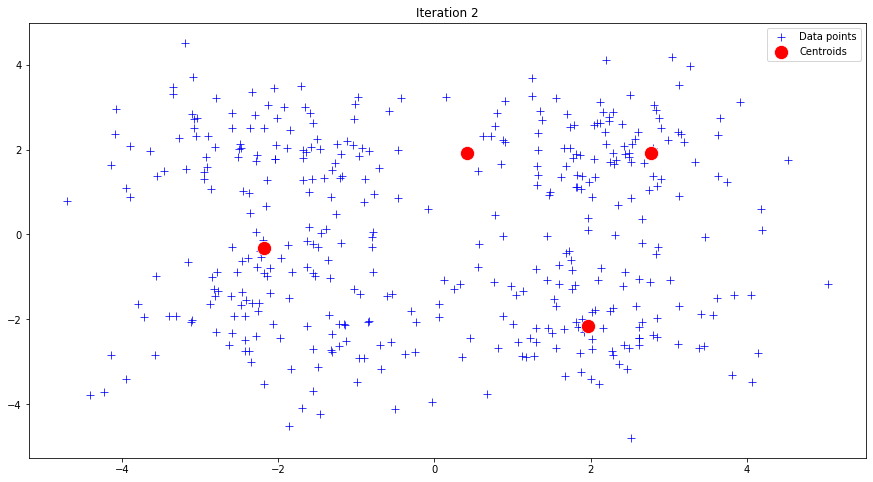

In [562]:
## Let's check how the centroids move after 2 more iterations
dist_mat = find_dist(dat,centroids)
cluster_assignment = assign_cluster(dist_mat)
centroids = find_centroid(dat,cluster_assignment,k)
plt.figure(figsize=(15,8))
sns.scatterplot(x = dat[:,0], y = dat[:,1], color = 'blue', marker="+", s = 50, label = 'Data points')
sns.scatterplot(x = centroids[:,0], y = centroids[:,1], color = 'red', s = 200, label = 'Centroids')
plt.title('Iteration 2')

Text(0.5, 1.0, 'Iteration 3')

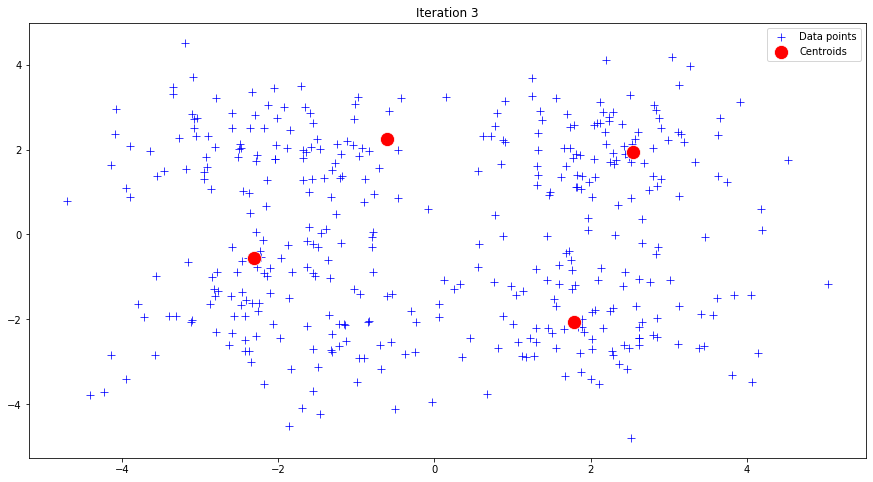

In [563]:
dist_mat = find_dist(dat,centroids)
cluster_assignment = assign_cluster(dist_mat)
centroids = find_centroid(dat,cluster_assignment,k)
plt.figure(figsize=(15,8))
sns.scatterplot(x = dat[:,0], y = dat[:,1], color = 'blue', marker="+", s = 50, label = 'Data points')
sns.scatterplot(x = centroids[:,0], y = centroids[:,1], color = 'red', s = 200, label = 'Centroids')
plt.title('Iteration 3')

### We can see that the centroids are drifting to the expected cluster centers. Now let us just run this in a loop till it converges. 

In [564]:
# Assigning the current cluster assignment to variable old_cluster_assignment and initializing a new variable
old_cluster_assignment = cluster_assignment
new_cluster_assignment = np.zeros(len(old_cluster_assignment))

In [565]:
# We will iterate till the old and new cluster assignments match 

In [566]:
ctr = 0
while not np.array_equal(old_cluster_assignment, new_cluster_assignment):
    dist_mat = find_dist(dat,centroids)
    old_cluster_assignment = new_cluster_assignment
    new_cluster_assignment = assign_cluster(dist_mat)
    centroids = find_centroid(dat,new_cluster_assignment,k)
    ctr += 1

Text(0.5, 1.0, 'Afrer final Iteration')

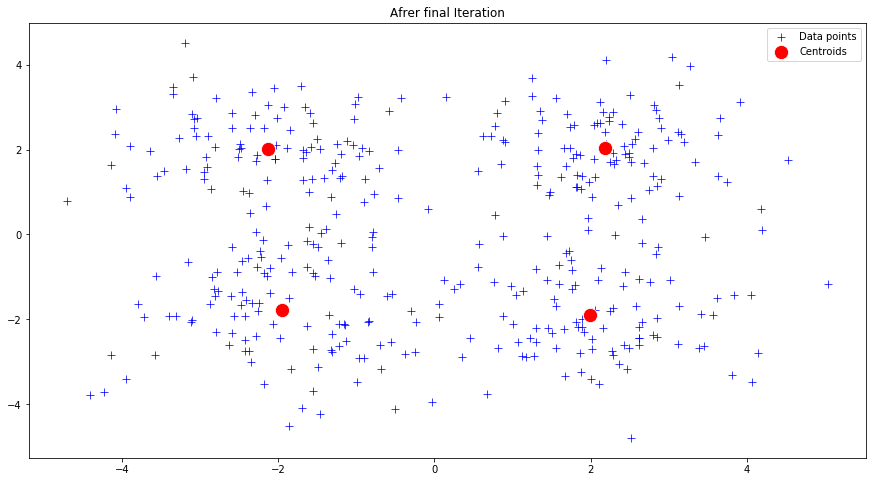

In [567]:
centroids = find_centroid(dat,old_cluster_assignment,k)
plt.figure(figsize=(15,8))
sns.scatterplot(x = dat[:,0], y = dat[:,1], color = 'blue', marker="+", s = 50, label = 'Data points')
sns.scatterplot(x = centroids[:,0], y = centroids[:,1], color = 'red', s = 200, label = 'Centroids')
plt.title('Afrer final Iteration')

In [568]:
ctr

5

## After 12 iterations it can be seen that, the centroids have converged to the expected cluster centers. 

Text(0.5, 1.0, 'Compare the original and final cluster centroids')

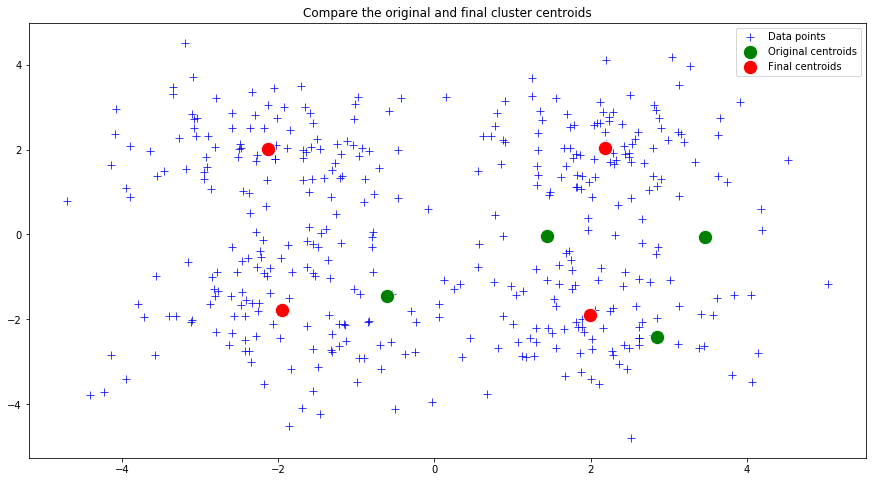

In [569]:
# Let us compare the original centroids with the final centroids
plt.figure(figsize=(15,8))
sns.scatterplot(x = dat[:,0], y = dat[:,1], color = 'blue', marker="+", s = 50, label = 'Data points')
sns.scatterplot(x = original_centroids[:,0], y = original_centroids[:,1], color = 'green', s = 200, label = 'Original centroids')
sns.scatterplot(x = centroids[:,0], y = centroids[:,1], color = 'red', s = 200, label = 'Final centroids')
plt.title('Compare the original and final cluster centroids')

## Now as I promised let's see how to find the number of clusters. 
### One famous method is elbow method
**Definition:** *The elbow method plots the value of the cost function produced by different values of k. As you know, if k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.*

## Elbow Method
A good assessment for optimal number of clusters is that the distances of each data point from it's corresponding cluster centroid is as minimum as possible. The metric is defined as: 
### WCSS or Within Clusters Sum of Squares
Steps:
- 1. We change the value of K from 1 to 10
- 2. Find WCSS for each K
- 3. Plot WCSS vs K 
- 4. Find after which value of K, there is no significant improvement in WCSS metric

In [570]:
# Defining a function kmeans() that calls the previous defined functions in order
def kmeans(k, dat):
    centroids  = dat[[randint(0, len(dat)-1) for p in range(0, k)],:]
    dist_mat = find_dist(dat,centroids)
    cluster_assignment = assign_cluster(dist_mat)
    centroids = find_centroid(dat,cluster_assignment,k)
    old_cluster_assignment = cluster_assignment
    new_cluster_assignment = np.zeros(len(old_cluster_assignment))
    while not np.array_equal(old_cluster_assignment, new_cluster_assignment):
        dist_mat = find_dist(dat,centroids)
        old_cluster_assignment = new_cluster_assignment
        new_cluster_assignment = assign_cluster(dist_mat)
        centroids = find_centroid(dat,new_cluster_assignment,k)
    return centroids, new_cluster_assignment

Text(0.5, 1.0, 'Elbow method to determine optimum number of clusters')

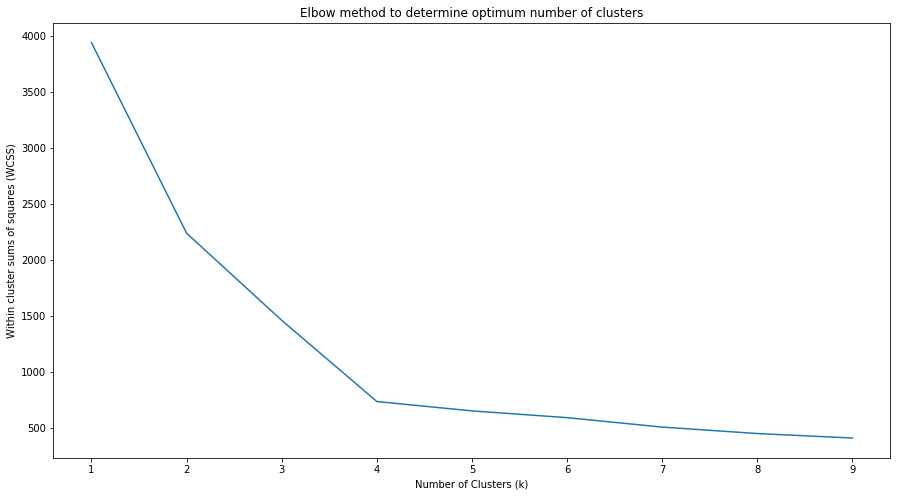

In [571]:
dat = random_data()
wcss = np.array([])
for k in range(1,10):
    centroids, cluster_assignment = kmeans(k, dat)
    s = 0
    for i in range(len(dat)):
        x = dat[i,:]
        c = centroids[int(cluster_assignment[i])]
        s += (x[0]-c[0])**2 + (x[1]-c[1])**2
    wcss = np.append(wcss ,s)
K_array = np.arange(1,10,1)
plt.figure(figsize=(15,8))
plt.plot(K_array,wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')

## From the elbow plot we can clearly see that after k = 4, there is no significant improvement in the WCSS metric as we increase the number of clusters. 
### Thus we can conclude that 4 is the optimal number of clusters for this dataset